In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'eda774ce-9ca7-464d-93bc-b8f1edc78ff6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
#   print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.914529e+07,1.914529e+07,NaN,1,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,20467.536790,3.741963e+10,14.1641,1.193532,5.985322,1.643693,-10.826236,-0.246334,-30.191493,3.918569e+11,38.4292,4.298183e+11,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
1,1027,Ethereum,ETH,ethereum,6080,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.222969e+08,1.222969e+08,NaN,2,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1700.945019,1.987179e+10,11.5094,0.732906,3.958962,6.970859,1.257809,47.870305,1.559723,2.080203e+11,20.4135,2.080203e+11,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
2,825,Tether,USDT,tether,39449,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754620e+10,6.915678e+10,NaN,3,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1.000116,5.528139e+10,11.9951,0.001994,0.003576,0.009198,-0.010031,0.055944,0.087231,6.755405e+10,6.6250,6.916481e+10,NaN,2022-09-09T05:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-09 05:28:24.843638
3,3408,USD Coin,USDC,usd-coin,6148,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.167542e+10,5.167542e+10,NaN,4,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1.000146,6.217839e+09,14.1189,0.014559,0.005518,0.022882,0.025883,0.019662,0.010875,5.168298e+10,5.0682,5.168298e+10,NaN,2022-09-09T05:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-09 05:28:24.843638
4,1839,BNB,BNB,bnb,1096,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,288.950975,9.749097e+08,8.6918,0.246275,3.658454,3.945639,-8.954755,24.709677,-0.088544,4.661856e+10,4.5716,5.779019e+10,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
5,4687,Binance USD,BUSD,binance-usd,5030,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.991450e+10,1.991450e+10,NaN,6,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1.000570,1.046645e+10,16.3613,0.077595,0.055370,0.045740,0.055807,-0.003317,-0.040750,1.992585e+10,1.9540,1.992585e+10,NaN,2022-09-09T05:26:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-09 05:28:24.843638
6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.964649e+10,9.998932e+10,NaN,7,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,0.348594,1.168711e+09,12.5973,-0.095513,4.513308,4.588937,-4.082531,8.401399,-9.653310,1.730645e+10,1.6983,3.485936e+10,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
7,2010,Cardano,ADA,cardano,567,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,0.491565,7.480117e+08,22.2351,0.413809,3.520866,7.512013,-3.580012,8.394597,-17.143497,1.680271e+10,1.6477,2.212044e+10,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
8,5426,Solana,SOL,solana,379,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.529869e+08,5.116169e+08,NaN,9,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,35.263712

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
     'start':'1',
     'limit':'10',
     'convert':'USD'
   }
    headers = {
     'Accepts': 'application/json',
     'X-CMC_PRO_API_KEY': 'eda774ce-9ca7-464d-93bc-b8f1edc78ff6',
   }

    session = Session()
    session.headers.update(headers)

    try:
     response = session.get(url, params=parameters)
     data = json.loads(response.text)
#   print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
     print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
#     if not os.path.isfile(r"D:\apicsv\API.csv"):
#         df.to_csv(r'D:\apicsv\API.csv',headers = 'column_names')
#     else:
#         df.to_csv(r'D:\apicsv\API.csv',mode='a',headers = 'False')
       

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Run Sucessful")
    sleep(60)
exit()    

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\905721368.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run Sucessful


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\905721368.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run Sucessful


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\905721368.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run Sucessful


KeyboardInterrupt: 

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19145287.00000,19145287.00000,NaN,1,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,20467.53679,37419629214.24512,14.16410,1.19353,5.98532,1.64369,-10.82624,-0.24633,-30.19149,391856866031.17035,38.42920,429818272593.90997,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
1,1027,Ethereum,ETH,ethereum,6080,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122296925.12400,122296925.12400,NaN,2,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1700.94502,19871785732.89079,11.50940,0.73291,3.95896,6.97086,1.25781,47.87031,1.55972,208020345586.04675,20.41350,208020345586.04999,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
2,825,Tether,USDT,tether,39449,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67546203603.49181,69156782826.54327,NaN,3,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1.00012,55281390553.95371,11.99510,0.00199,0.00358,0.00920,-0.01003,0.05594,0.08723,67554045997.21194,6.62500,69164812215.17999,NaN,2022-09-09T05:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-09 05:28:24.843638
3,3408,USD Coin,USDC,usd-coin,6148,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,51675423965.24750,51675423965.24750,NaN,4,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1.00015,6217839186.09642,14.11890,0.01456,0.00552,0.02288,0.02588,0.01966,0.01088,51682981127.07640,5.06820,51682981127.08000,NaN,2022-09-09T05:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-09 05:28:24.843638
4,1839,BNB,BNB,bnb,1096,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,288.95097,974909747.95075,8.69180,0.24627,3.65845,3.94564,-8.95475,24.70968,-0.08854,46618558853.06258,4.57160,57790194947.04000,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
5,4687,Binance USD,BUSD,binance-usd,5030,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,19914503967.49926,19914503967.49926,NaN,6,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,1.00057,10466451212.33970,16.36130,0.07760,0.05537,0.04574,0.05581,-0.00332,-0.04075,19925852322.45547,1.95400,19925852322.46000,NaN,2022-09-09T05:26:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-09-09 05:28:24.843638
6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49646492379.00000,99989318921.00000,NaN,7,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,0.34859,1168711040.64522,12.59730,-0.09551,4.51331,4.58894,-4.08253,8.40140,-9.65331,17306449221.08870,1.69830,34859359426.59000,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
7,2010,Cardano,ADA,cardano,567,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34182044152.62900,34854947575.48000,NaN,8,NaN,NaN,NaN,2022-09-09T05:26:00.000Z,0.49157,748011652.50043,22.23510,0.41381,3.52087,7.51201,-3.58001,8.39460,-17.14350,16802706318.23485,1.64770,22120437880.90000,NaN,2022-09-09T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-09 05:28:24.843638
8,5426,Solana,SO

In [10]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.15307,6.02123,1.69669,-10.78633,-0.20848,-30.16317
Ethereum,0.71968,3.94996,7.00726,1.27785,47.91031,1.59693
Tether,0.00232,0.00171,0.00895,-0.01339,0.05860,0.08717
USD Coin,0.00924,0.00034,0.01694,0.01742,0.01509,0.00472
BNB,0.22256,3.65848,3.99833,-8.95147,24.75049,-0.04800
Binance USD,0.06132,0.03282,0.02571,0.02769,-0.00915,-0.03003
XRP,-0.03964,4.53908,4.64620,-4.02657,8.43973,-9.61333
Cardano,0.47011,3.54167,7.53384,-3.57100,8.39509,-17.08931
Solana,1.15984,8.21029,11.56636,-10.87516,-0.85021,-6.30667


In [11]:
df4 = df3.stack()
df4

name                                          
Bitcoin           quote.USD.percent_change_1h      1.15307
                  quote.USD.percent_change_24h     6.02123
                  quote.USD.percent_change_7d      1.69669
                  quote.USD.percent_change_30d   -10.78633
                  quote.USD.percent_change_60d    -0.20848
                  quote.USD.percent_change_90d   -30.16317
Ethereum          quote.USD.percent_change_1h      0.71968
                  quote.USD.percent_change_24h     3.94996
                  quote.USD.percent_change_7d      7.00726
                  quote.USD.percent_change_30d     1.27785
                  quote.USD.percent_change_60d    47.91031
                  quote.USD.percent_change_90d     1.59693
Tether            quote.USD.percent_change_1h      0.00232
                  quote.USD.percent_change_24h     0.00171
                  quote.USD.percent_change_7d      0.00895
                  quote.USD.percent_change_30d    -0.01339
         

In [72]:
type(df4)

pandas.core.series.Series

In [12]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                   
Bitcoin          quote.USD.percent_change_1h    1.15307
                 quote.USD.percent_change_24h   6.02123
                 quote.USD.percent_change_7d    1.69669
                 quote.USD.percent_change_30d -10.78633
                 quote.USD.percent_change_60d  -0.20848
                 quote.USD.percent_change_90d -30.16317
Ethereum         quote.USD.percent_change_1h    0.71968
                 quote.USD.percent_change_24h   3.94996
                 quote.USD.percent_change_7d    7.00726
                 quote.USD.percent_change_30d   1.27785
                 quote.USD.percent_change_60d  47.91031
                 quote.USD.percent_change_90d   1.59693
Tether           quote.USD.percent_change_1h    0.00232
                 quote.USD.percent_change_24h   0.00171
                 quote.USD.percent_change_7d    0.00895
                 quote.USD.percent_change_30d  -0.01339
                 quote.USD.percent_change_60d   0.05860
                 quote.USD.percent_change_90d   0.08717
USD Coin         quote.USD.percent_change_1h    0.00924
                 quote.USD.percent_change_24h   0.00034
                 quote.USD.percent_change_7d    0.01694
                 quote.USD.percent_change_30d   0.01742
                 quote.USD.percent_change_60d   0.01509
                 quote.USD.percent_change_90d   0.00472
BNB              quote.USD.percent_change_1h    0.22256
                 quote.USD.percent_change_24h   3.65848
                 quote.USD.percent_change_7d    3.99833
                 quote.USD.percent_change_30d  -8.95147
                 quote.USD.percent_change_60d  24.75049
                 quote.USD.percent_change_90d  -0.04800
Binance USD      quote.USD.percent_change_1h    0.06132
                 quote.USD.percent_change_24h   0.03282
                 quote.USD.percent_change_7d    0.02571
                 quote.USD.percent_change_30d   0.02769
                 quote.USD.percent_change_60d  -0.00915
                 quote.USD.percent_change_90d  -0.03003
XRP              quote.USD.percent_change_1h   -0.03964
                 quote.USD.percent_change_24h   4.53908
                 quote.USD.percent_change_7d    4.64620
                 quote.USD.percent_change_30d  -4.02657
                 quote.USD.percent_change_60d   8.43973
                 quote.USD.percent_change_90d  -9.61333
Cardano          quote.USD.percent_change_1h    0.47011
                 quote.USD.percent_change_24h   3.54167
                 quote.USD.percent_change_7d    7.53384
                 quote.USD.percent_change_30d  -3.57100
                 quote.USD.percent_change_60d   8.39509
                 quote.USD.percent_change_90d -17.08931
Solana           quote.USD.percent_change_1h    1.15984
                 quote.USD.percent_change_24h   8.21029
                 quote.USD.percent_change_7d   11.56636
                 quote.USD.percent_change_30d -10.87516
                 quote.USD.percent_change_60d  -0.85021
                 quote.USD.percent_change_90d  -6.30667
Polkadot         quote.USD.percent_change_1h   -0.01618
                 quote.USD.percent_change_24h   6.23695
                 quote.USD.percent_change_7d    5.23229
                 quote.USD.percent_change_30d -12.21384
                 quote.USD.percent_change_60d  12.09665
                 quote.USD.percent_change_90d -13.11600
Dogecoin         quote.USD.percent_change_1h    0.54694
                 quote.USD.percent_change_24h   3.14211
                 quote.USD.percent_change_7d    0.74336
                 quote.USD.percent_change_30d  -8.00851
                 quote.USD.percent_change_60d  -4.83220
                 quote.USD.percent_change_90d -17.59784
Polygon          quote.USD.percent_change_1h    0.35022
                 quote.USD.percent_change_24h   3.92363
                 quote.USD.percent_change_7d   -1.09421
                 quote.USD.percent_change_30d  -1.40559
                 

In [13]:
df5.count()

values    120
dtype: int64

In [14]:
index = pd.Index(range(120))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.15307
1,Bitcoin,quote.USD.percent_change_24h,6.02123
2,Bitcoin,quote.USD.percent_change_7d,1.69669
3,Bitcoin,quote.USD.percent_change_30d,-10.78633
4,Bitcoin,quote.USD.percent_change_60d,-0.20848
5,Bitcoin,quote.USD.percent_change_90d,-30.16317
6,Ethereum,quote.USD.percent_change_1h,0.71968
7,Ethereum,quote.USD.percent_change_24h,3.94996
8,Ethereum,quote.USD.percent_change_7d,7.00726
9,Ethereum,quote.USD.percent_change_30d,1.27785


In [15]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.15307
1,Bitcoin,quote.USD.percent_change_24h,6.02123
2,Bitcoin,quote.USD.percent_change_7d,1.69669
3,Bitcoin,quote.USD.percent_change_30d,-10.78633
4,Bitcoin,quote.USD.percent_change_60d,-0.20848
5,Bitcoin,quote.USD.percent_change_90d,-30.16317
6,Ethereum,quote.USD.percent_change_1h,0.71968
7,Ethereum,quote.USD.percent_change_24h,3.94996
8,Ethereum,quote.USD.percent_change_7d,7.00726
9,Ethereum,quote.USD.percent_change_30d,1.27785


In [16]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.15307
1,Bitcoin,24h,6.02123
2,Bitcoin,7d,1.69669
3,Bitcoin,30d,-10.78633
4,Bitcoin,60d,-0.20848
5,Bitcoin,90d,-30.16317
6,Ethereum,quote.USD.percent_change_1h,0.71968
7,Ethereum,24h,3.94996
8,Ethereum,7d,7.00726
9,Ethereum,30d,1.27785


In [17]:
import seaborn as sns

import matplotlib.pyplot as plt


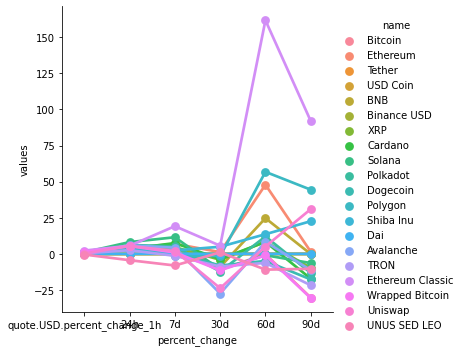

In [18]:
sns.catplot(x='percent_change', y='values', hue ='name', data=df7, kind= 'point')

In [19]:
df10 = df[['name', 'quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,20467.53679,2022-09-09 05:28:24.843638
0,Bitcoin,20467.53679,2022-09-09 05:29:14.146039
0,Bitcoin,20482.64982,2022-09-09 05:30:15.063273
0,Bitcoin,20485.35118,2022-09-09 05:31:17.470381
